In [1]:
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
sns.set_theme()

Function for cleaning the dataset

In [2]:
def clean(dataset):
    codes = dataset.groupby("Area Code").count().index
    i = 0
    data1 = [pd.DataFrame()] * len(codes)
    curName = ""
    for ind in codes:
        data1[i] = dataset[dataset["Area Code"] == ind]
        curName = data1[i]["Area Name"].reset_index(drop=True)[0]
        data1[i] = data1[i].pivot_table("Value",index="Year",columns="Series",aggfunc='mean')
        data1[i]["Area Code"] = [ind] * len(data1[i])
        data1[i]["Area Name"] = [curName] * len(data1[i])
        data1[i]=data1[i].reset_index()
        i = i+1

    data_final = data1[0]
    for ind in range(len(data1)):
        if(ind!=0):
            data_final = pd.concat([data_final, data1[ind]])
    data_final = data_final.reset_index(drop=True)
    return data_final

def recent(df):
    new_df = ((df.sort_values(by=['Year']).drop_duplicates(subset=['Area Name'], keep='last')).sort_values(by = ['Area Name']))
    new_df = new_df.drop(columns = ['Year'])
    return new_df

In [3]:
data_health = pd.read_csv("SYB64_325_202110_Expenditure on health.csv", encoding='latin-1')
data_growth = pd.read_csv("SYB61_253_Population Growth Rates in Urban areas and Capital cities.csv", encoding = "latin-1")
data_pop = pd.read_csv("SYB64_1_202110_Population, Surface Area and Density.csv", encoding = "latin-1")
data_trade = pd.read_csv("SYB64_123_202110_Total Imports Exports and Balance of Trade.csv", encoding = "latin-1")
data_cpi = pd.read_csv("SYB64_128_202110_Consumer Price Index.csv", encoding = "latin-1")
data_land = pd.read_csv("SYB64_145_202110_Land.csv", encoding = "latin-1")
data_employment = pd.read_csv("SYB64_200_202110_Employment.csv", encoding = "latin-1")
data_gdp = pd.read_csv("SYB64_230_202110_GDP and GDP Per Capita.csv", encoding = "latin-1")
data_mortality = pd.read_csv("SYB64_246_202110_Population Growth, Fertility and Mortality Indicators.csv", encoding = "latin-1")
data_health = pd.read_csv("SYB64_325_202110_Expenditure on health.csv", encoding = "latin-1")
data_death = pd.read_csv("Death Cause Reason by Country.csv", encoding = "latin-1")

In [4]:
health = clean(data_health)
growth = clean(data_growth)
pop = clean(data_pop)
trade = clean(data_trade)
cpi = clean(data_cpi)
land = clean(data_land)
employment = clean(data_employment)
gdp = clean(data_gdp)
mortality = clean(data_mortality)


In [14]:
pop.head()

Series,Year,Area Code,Area Name,Population aged 0 to 14 years old (percentage),Population aged 60+ years old (percentage),Population density,Population mid-year estimates (millions),Population mid-year estimates for females (millions),Population mid-year estimates for males (millions),Sex ratio (males per 100 females),Surface area (thousand km2)
0,2010,1,"Total, all countries or areas",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,"Total, all countries or areas",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,"Total, all countries or areas",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,1,"Total, all countries or areas",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,2,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#health['Year'] = pd.to_datetime(health['Year'])
rec_health = recent(health)
rec_growth = recent(growth)
rec_pop = recent(pop)
rec_trade = recent(trade)
rec_cpi = recent(cpi)
rec_land = recent(land)
rec_employment = recent(employment)
rec_gdp = recent(gdp)
rec_mortality = recent(mortality)

In [15]:
rec_pop.head(20)

Series,Area Code,Area Name,Population aged 0 to 14 years old (percentage),Population aged 60+ years old (percentage),Population density,Population mid-year estimates (millions),Population mid-year estimates for females (millions),Population mid-year estimates for males (millions),Sex ratio (males per 100 females),Surface area (thousand km2)
11,4,Afghanistan,41.2,4.3,61.0,39.84,19.40,20.44,105.3,NaN
7,2,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,8,Albania,17.1,21.9,104.9,2.87,1.41,1.46,103.6,NaN
31,12,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,16,American Samoa,NaN,NaN,275.5,0.06,NaN,NaN,NaN,NaN
59,19,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,20,Andorra,NaN,NaN,164.6,0.08,NaN,NaN,NaN,NaN
71,24,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
831,660,Anguilla,NaN,NaN,168.1,0.02,NaN,NaN,NaN,NaN
75,28,Antigua and Barbuda,21.7,14.6,224.4,0.10,0.05,0.05,93.4,NaN


In [18]:
#merging = [df.set_index(['Area Name', 'Area Code']) for df in [rec_health, rec_growth, rec_pop, rec_trade, rec_cpi, rec_land, rec_employment, rec_gdp, rec_mortality]]
#merged = pd.concat(merging, axis=1).reset_index()
#merged.head()

df_merge = [rec_growth, rec_pop, rec_trade, rec_cpi, rec_land, rec_employment, rec_gdp, rec_mortality]
merged = rec_health
for df in df_merge:
    merged = merged.merge(df, how="left", on=['Area Name', 'Area Code'])
    #print(merged.shape[0])
#print(merged)
#merged.head()

data_death['total deaths'] = data_death.sum(axis = 1)
data_death.head()

,Country Name,Covid-19 Deaths,Cardiovascular diseases,Respiratory diseases,Kidney diseases,Neonatal disorders,Meningitis,Malaria,Interpersonal violence,HIV/AIDS,...,"Fire, heat",Drowning,Drug use disorders,Road injuries,Environmental heat and cold exposure,Self-harm,Conflict and terrorism,Diabetes,Unnamed: 32,total deaths
0,Afghanistan,2201.0,61995,7082,5637,23701,1563,530,5015,318,...,485,1687,406,8254,59,1613,24295,4817,NaN,1098570.0
1,Albania,1181.0,12904,815,329,161,13,0,57,2,...,18,36,29,243,4,152,0,175,NaN,116825.0
2,Algeria,2762.0,97931,7528,8201,8756,292,0,459,264,...,782,526,526,11051,40,1515,13,5328,NaN,975240.0
3,Andorra,84.0,169,39,16,0,0,0,0,3,...,0,0,0,8,0,8,0,9,NaN,3355.0
4,Angola,33.0,25724,3934,2464,18189,2520,10784,974,16802,...,513,793,80,9253,114,1928,16,4033,NaN,866715.0


In [21]:
data_death.head()
#merged.head()

combine = pd.merge(merged, data_death, how = "inner", left_on = "Area Name", right_on = "Country Name")
combine["death_standardized"] = (combine["total deaths"]/1000000)/combine["Population mid-year estimates (millions)"]
combine["covid_standardized"] = (combine["Covid-19 Deaths"]/1000000)/combine["Population mid-year estimates (millions)"]
print(combine["covid_standardized"].dtypes)
combine

float64


,Current health expenditure (% of GDP),Domestic general government health expenditure (% of total government expenditure),Area Code,Area Name,Rural population (percent growth rate per annum),Urban population (percent growth rate per annum),Urban population (percent),Capital city population (as a percentage of total population),Capital city population (as a percentage of total urban population),Capital city population (thousands),...,Drug use disorders,Road injuries,Environmental heat and cold exposure,Self-harm,Conflict and terrorism,Diabetes,Unnamed: 32,total deaths,death_standardized,covid_standardized
0,9.4,1.8,4,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,...,406,8254,59,1613,24295,4817,NaN,1098570.0,0.027575,0.000055
1,5.3,9.7,8,Albania,NaN,NaN,60.3,NaN,NaN,476.0,...,29,243,4,152,0,175,NaN,116825.0,0.040706,0.000411
2,6.2,10.7,12,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,...,526,11051,40,1515,13,5328,NaN,975240.0,NaN,NaN
3,6.7,18.6,20,Andorra,NaN,NaN,88.1,NaN,NaN,23.0,...,0,8,0,8,0,9,NaN,3355.0,0.041937,0.001050
4,2.5,5.4,24,Angola,NaN,NaN,NaN,NaN,NaN,NaN,...,80,9253,114,1928,16,4033,NaN,866715.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,9.2,20.2,858,Uruguay,NaN,NaN,NaN,NaN,NaN,NaN,...,15,560,6,666,0,895,NaN,161550.0,0.046289,0.000055
156,5.3,7.9,860,Uzbekistan,NaN,NaN,NaN,NaN,NaN,NaN,...,188,4929,178,3793,0,8154,NaN,1043585.0,0.030748,0.000018
157,5.2,3.8,887,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,...,261,11717,43,1560,13402,1815,NaN,810520.0,0.026583,0.000020
158,4.9,7.0,894,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,...,60,2285,84,1398,1,2573,NaN,601935.0,0.031815,0.000021


In [36]:
pd.set_option('display.max_rows', None)
#print(combine.corr()["covid_standardized"].dropna().sort_values())
print(combine.corr()["death_standardized"].dropna().sort_values())

Permanent crops (thousand hectares)                                                   -1.000000
Permanent crops (% of total land area)                                                -1.000000
Forest cover (% of total land area)                                                   -1.000000
Population annual rate of increase (percent)                                          -0.753508
Imports CIF (millions of US dollars)                                                  -0.555177
Population aged 0 to 14 years old (percentage)                                        -0.547390
Total fertility rate (children per women)                                             -0.466892
Sex ratio (males per 100 females)                                                     -0.393430
Infant mortality for both sexes (per 1,000 live births)                               -0.389314
Employment by industry: Agriculture (%) Male                                          -0.323452
Employment by industry: Agriculture (%) 

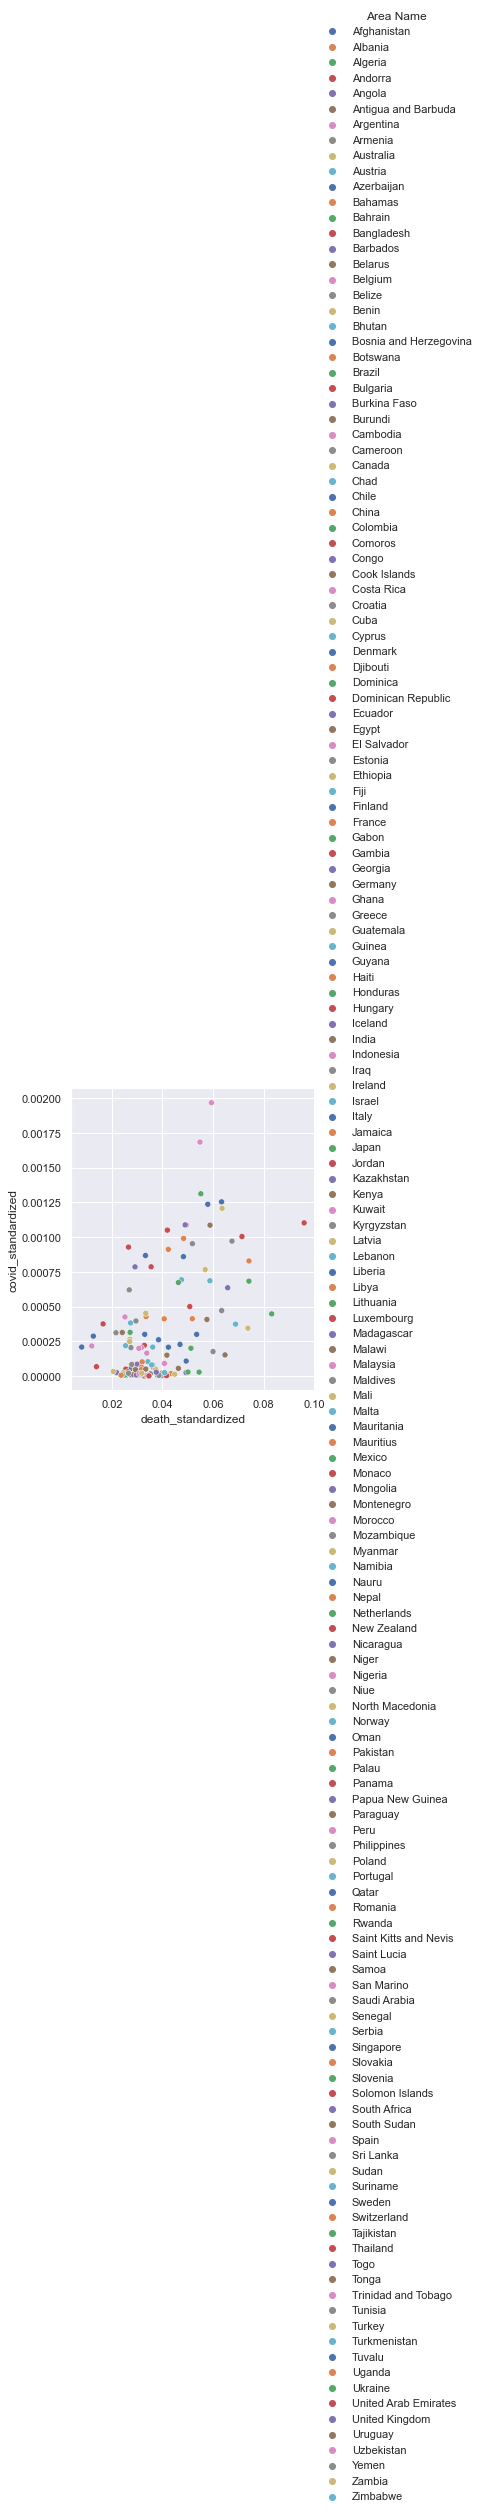

In [42]:
sample25 = combine.sample(25)
#sns.relplot(x = "Current health expenditure (% of GDP)", y = "covid_standardized", data = combine, kind = "scatter", hue = "Area Name", palette = "deep")
#sns.relplot(x = "Population aged 60+ years old (percentage)", y = "covid_standardized", data = combine, kind = "scatter", hue = "Area Name", palette = "deep")
sns.relplot(x = "death_standardized", y = "covid_standardized", data = combine, kind = "scatter", hue = "Area Name", palette = "deep")
